### Webscraping for stock comments

Webpage: https://mmb.moneycontrol.com/

In [2]:
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.service import Service as ChromeService 
from webdriver_manager.chrome import ChromeDriverManager 
import time 
import pandas as pd

In [4]:
# instantiate options 
options = webdriver.ChromeOptions() 
 
# run browser in headless mode 
options.headless = True 
 
# instantiate driver 
driver = webdriver.Chrome(service=ChromeService( 
	ChromeDriverManager().install()), options=options) 
 
# load website 
url = 'https://mmb.moneycontrol.com/' 
# instantiate height of webpage 
last_height = driver.execute_script('return document.body.scrollHeight') 
 
# get the entire website content 
driver.get(url) 

# set target count 
itemTargetCount =4000

# instantiate items 
items = [] 
comments = []

i = 0
Stock_elements = []

# scroll to bottom of webpage 
while itemTargetCount > len(Stock_elements): 
    print(i)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);') 
    print("finished step driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')")
 
    # wait for content to load 
    time.sleep(10)
    print('sleep')
 
    new_height = driver.execute_script('return document.body.scrollHeight') 
    print("new_height = driver.execute_script('return document.body.scrollHeight')")
 
    if new_height == last_height: 
        break 
 
    last_height == new_height 
    print('equality')
 
    Stock_elements = driver.find_elements(By.CLASS_NAME, 'postItem_heading__2odZU') 
    print('stock elements found')
    
    Stock_comment_elements = driver.find_elements(By.CLASS_NAME, 'postItem_text_paragraph__3XhZQ') 
    print('comments found')

    comment_time_elements = driver.find_elements(By.CLASS_NAME, 'postItem_price__1yXow') 
    print('time found')
    
    user_level_elements = driver.find_elements(By.CLASS_NAME, 'postItem_designation__2D9CJ') 
    print('designation found')
    print(len(Stock_elements))
 
    i += 1


0
finished step driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
sleep
new_height = driver.execute_script('return document.body.scrollHeight')
equality
stock elements found
comments found
time found
designation found
20


In [ ]:
stock_names = [element.text for element in Stock_elements]
stock_comments = [element.text for element in Stock_comment_elements]
comment_time = [element.text for element in comment_time_elements]
designation = [element.text for element in user_level_elements]

In [ ]:
df = pd.DataFrame({'Stock': stock_names[:4000]
                   , 'Comment': stock_comments[:4000]
                  , 'Time': comment_time[:4000]
                  , 'Designation': designation[:4000]})
df.to_csv('allcomments.csv')

## Modelling

In [5]:
data=pd.read_csv("zomato.csv")
format_string = "schedule%I:%M %p %b %d %Y"
data["formatted_time"] = pd.to_datetime(data["Time"].str.slice(0, -2)+" 2023", format=format_string,errors='coerce')
data = data.dropna(subset=["formatted_time"])
data

,Unnamed: 0,Stock,Comment,Time,Designation,formatted_time
1,1,Zomato,if next result show 25-50 crore profit...its w...,schedule8:47 PM Sep 15th,Silver Member,2023-09-15 20:47:00
3,3,Zomato,may close 102 or below....but this companies f...,schedule1:31 PM Oct 3rd,Silver Member,2023-10-03 13:31:00
4,4,Zomato,can someone share how we can check live delive...,schedule11:44 AM Oct 3rd,New Member,2023-10-03 11:44:00
5,5,Zomato,Let the world cup starts. It will heads to 140,schedule12:52 PM Sep 26th,New Member,2023-09-26 12:52:00
6,6,Zomato,"riskyinv: when people hear bad news, theyll tr...",schedule9:45 AM Sep 21st,New Member,2023-09-21 09:45:00
...,...,...,...,...,...,...
425,425,Zomato,Sell on rise to 95/96. sell the news whatever ...,schedule9:15 AM Aug 28th,Bronze Member,2023-08-28 09:15:00
426,426,Zomato,block deat at 90.20 if see above 95 plus book ...,schedule9:15 AM Aug 28th,Bronze Member,2023-08-28 09:15:00
427,427,Zomato,Most of the comments here are positive but I s...,schedule9:10 AM Aug 28th,Bronze Member,2023-08-28 09:10:00
428,428,Zomato,rpts suggest co rolled out platform fee of rs ...,schedule9:10 AM Aug 28th,Bronze Member,2023-08-28 09:10:00


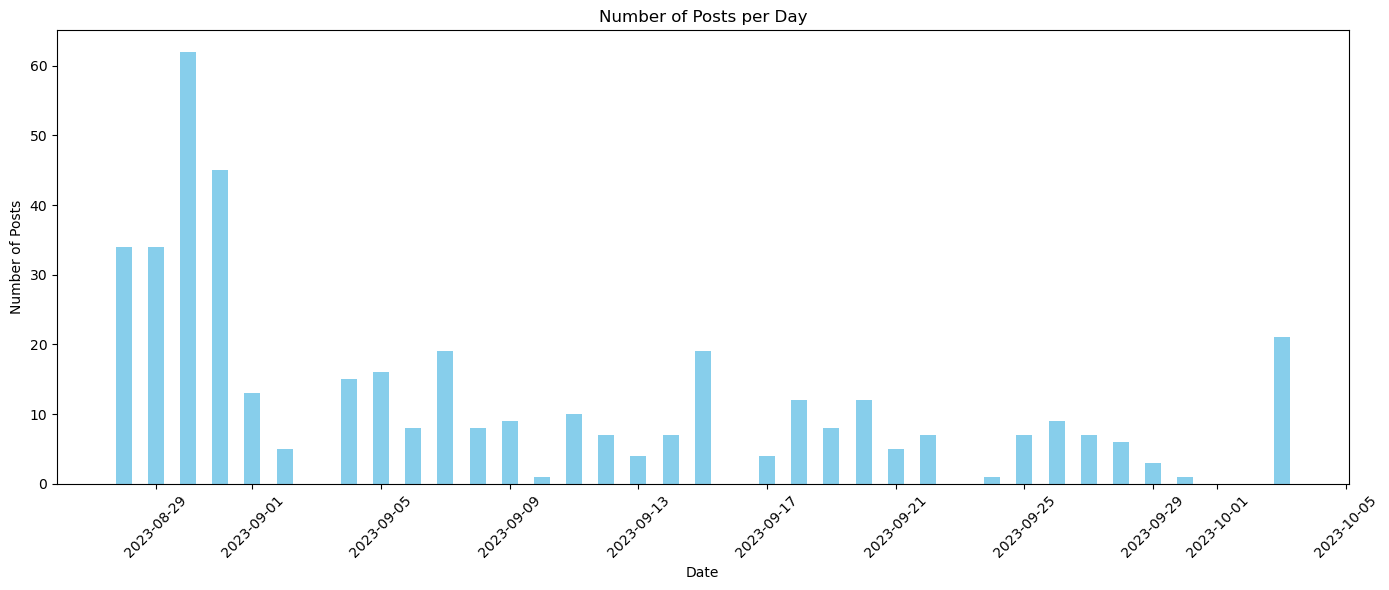

In [6]:
import matplotlib.pyplot as plt

data["date"] = data["formatted_time"].dt.date

# Group the data by date and count the number of posts for each day
post_count_per_day = data.groupby("date").size().reset_index(name="post_count")

# Create a bar chart to visualize the number of posts per day
plt.figure(figsize=(14, 6))  # Increase the figure size to provide more space for x-axis labels
plt.bar(post_count_per_day["date"], post_count_per_day["post_count"], width=0.5, color='skyblue')
plt.title("Number of Posts per Day")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees for vertical labels
plt.tight_layout()
plt.show()

In [7]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import re
import numpy as np


nlp = spacy.load('en_core_web_lg')

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Remove special characters, punctuation, and extra whitespaces
    text = str(text) + ' '
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Clean and tokenize the "Comment" column
data['Cleaned_Comment'] = data['Comment'].apply(clean_and_tokenize)

# Function to calculate cosine similarity
def calculate_cosine_similarity(comment,word):
    word_embedding=nlp(word).vector
    comment_embedding = nlp(comment).vector
    similarity_score = cosine_similarity([comment_embedding], [word_embedding])[0][0]
    return similarity_score

words_to_compare='buy'
data['Cosine_Similarity_to_Buy'] = data['Cleaned_Comment'].apply(lambda x: calculate_cosine_similarity(x, words_to_compare))

words_to_compare='sell'
data['Cosine_Similarity_to_Sell'] = data['Cleaned_Comment'].apply(lambda x: calculate_cosine_similarity(x, words_to_compare))


In [8]:
data

,Unnamed: 0,Stock,Comment,Time,Designation,formatted_time,date,Cleaned_Comment,Cosine_Similarity_to_Buy,Cosine_Similarity_to_Sell
1,1,Zomato,if next result show 25-50 crore profit...its w...,schedule8:47 PM Sep 15th,Silver Member,2023-09-15 20:47:00,2023-09-15,if next result show 2550 crore profitits will ...,0.234929,0.306764
3,3,Zomato,may close 102 or below....but this companies f...,schedule1:31 PM Oct 3rd,Silver Member,2023-10-03 13:31:00,2023-10-03,may close 102 or belowbut this companies futur...,0.199158,0.231230
4,4,Zomato,can someone share how we can check live delive...,schedule11:44 AM Oct 3rd,New Member,2023-10-03 11:44:00,2023-10-03,can someone share how we can check live delive...,0.309939,0.326902
5,5,Zomato,Let the world cup starts. It will heads to 140,schedule12:52 PM Sep 26th,New Member,2023-09-26 12:52:00,2023-09-26,Let the world cup starts It will heads to 140,0.062749,0.124905
6,6,Zomato,"riskyinv: when people hear bad news, theyll tr...",schedule9:45 AM Sep 21st,New Member,2023-09-21 09:45:00,2023-09-21,riskyinv when people hear bad news theyll try ...,0.367515,0.433627
...,...,...,...,...,...,...,...,...,...,...
425,425,Zomato,Sell on rise to 95/96. sell the news whatever ...,schedule9:15 AM Aug 28th,Bronze Member,2023-08-28 09:15:00,2023-08-28,Sell on rise to 9596 sell the news whatever it...,0.228715,0.334406
426,426,Zomato,block deat at 90.20 if see above 95 plus book ...,schedule9:15 AM Aug 28th,Bronze Member,2023-08-28 09:15:00,2023-08-28,block deat at 9020 if see above 95 plus book 1...,0.258047,0.311539
427,427,Zomato,Most of the comments here are positive but I s...,schedule9:10 AM Aug 28th,Bronze Member,2023-08-28 09:10:00,2023-08-28,Most of the comments here are positive but I s...,0.115933,0.216171
428,428,Zomato,rpts suggest co rolled out platform fee of rs ...,schedule9:10 AM Aug 28th,Bronze Member,2023-08-28 09:10:00,2023-08-28,rpts suggest co rolled out platform fee of rs ...,0.064644,0.157598


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply the sentiment analysis function to each row in the "Cleaned_Comment" column
data['Sentiment_Scores'] = data['Cleaned_Comment'].apply(get_sentiment_scores)

# Extract the sentiment scores
data['Compound_Score'] = data['Sentiment_Scores'].apply(lambda x: x['compound'])
data.drop(['Sentiment_Scores'], axis=1,inplace=True)
# Print the DataFrame with sentiment scores

data

,Unnamed: 0,Stock,Comment,Time,Designation,formatted_time,date,Cleaned_Comment,Cosine_Similarity_to_Buy,Cosine_Similarity_to_Sell,Compound_Score
1,1,Zomato,if next result show 25-50 crore profit...its w...,schedule8:47 PM Sep 15th,Silver Member,2023-09-15 20:47:00,2023-09-15,if next result show 2550 crore profitits will ...,0.234929,0.306764,0.8183
3,3,Zomato,may close 102 or below....but this companies f...,schedule1:31 PM Oct 3rd,Silver Member,2023-10-03 13:31:00,2023-10-03,may close 102 or belowbut this companies futur...,0.199158,0.231230,0.5777
4,4,Zomato,can someone share how we can check live delive...,schedule11:44 AM Oct 3rd,New Member,2023-10-03 11:44:00,2023-10-03,can someone share how we can check live delive...,0.309939,0.326902,0.2960
5,5,Zomato,Let the world cup starts. It will heads to 140,schedule12:52 PM Sep 26th,New Member,2023-09-26 12:52:00,2023-09-26,Let the world cup starts It will heads to 140,0.062749,0.124905,0.0000
6,6,Zomato,"riskyinv: when people hear bad news, theyll tr...",schedule9:45 AM Sep 21st,New Member,2023-09-21 09:45:00,2023-09-21,riskyinv when people hear bad news theyll try ...,0.367515,0.433627,-0.1027
...,...,...,...,...,...,...,...,...,...,...,...
425,425,Zomato,Sell on rise to 95/96. sell the news whatever ...,schedule9:15 AM Aug 28th,Bronze Member,2023-08-28 09:15:00,2023-08-28,Sell on rise to 9596 sell the news whatever it...,0.228715,0.334406,0.3412
426,426,Zomato,block deat at 90.20 if see above 95 plus book ...,schedule9:15 AM Aug 28th,Bronze Member,2023-08-28 09:15:00,2023-08-28,block deat at 9020 if see above 95 plus book 1...,0.258047,0.311539,-0.5423
427,427,Zomato,Most of the comments here are positive but I s...,schedule9:10 AM Aug 28th,Bronze Member,2023-08-28 09:10:00,2023-08-28,Most of the comments here are positive but I s...,0.115933,0.216171,-0.2382
428,428,Zomato,rpts suggest co rolled out platform fee of rs ...,schedule9:10 AM Aug 28th,Bronze Member,2023-08-28 09:10:00,2023-08-28,rpts suggest co rolled out platform fee of rs ...,0.064644,0.157598,0.0000


In [11]:
import yfinance as yf
rel = yf.Ticker("ZOMATO.NS")
df = rel.history(interval='1h', start=min(data["date"]), end=max(data["date"]))
df.reset_index(inplace=True)

In [12]:
from datetime import timedelta
import pandas as pd
import sqlite3

# Assuming df and data are your dataframes
# Convert the Datetime column to datetime objects if it's not already done
df['Datetime'] = pd.to_datetime(df['Datetime'])
data['formatted_time'] = pd.to_datetime(data['formatted_time'])

# Define a function to calculate the time range for each row in df
def calculate_time_range(row):
    start_time = row['Datetime'] - timedelta(hours=13)
    end_time = row['Datetime'] - timedelta(hours=1)
    return start_time, end_time

# Apply the function to create new columns in df
df['start_time'], df['end_time'] = zip(*df.apply(calculate_time_range, axis=1))

conn = sqlite3.connect(':memory:')
#write the tables
df.to_sql('df', conn, index=False)
data.to_sql('data', conn, index=False)

qry = '''
    select * from df a
    inner join
    data b
    on b.formatted_time>=a.start_time and b.formatted_time<a.end_time
    '''
result = pd.read_sql_query(qry, conn)

In [13]:
seniority_mapping = {
    'New Member': 1,
    'Bronze Member': 2,
    'Silver Member': 3,
    'Gold Member': 4,
    'Platinum Member': 5
}

# Map the seniority levels to numbers and create a new integer column
result['seniority_number'] = result['Designation'].map(seniority_mapping)

In [14]:
agg_result = result.groupby('Datetime').agg({
    'Open': 'max',
    'seniority_number': 'mean',
    'Cosine_Similarity_to_Sell': 'mean',
    'Cosine_Similarity_to_Buy': 'mean',
    'Compound_Score': 'mean',
    'Low': 'count'
}).reset_index()
agg_result.rename(columns={'Low': 'Row_Count'}, inplace=True)

In [15]:
import numpy as np
agg_result.sort_values(by='Datetime', inplace=True)

# Calculate the difference between 'open' and 'open' of the previous row
agg_result['open_difference'] = (agg_result['Open'] - agg_result['Open'].shift(1))/ (agg_result['Open'].shift(1))
agg_result = agg_result.drop(0)
# Reset the index if needed
agg_result.reset_index(drop=True, inplace=True)

# Display the DataFrame
agg_result['encoded_column'] = np.where(agg_result['open_difference'] > 0, 1, 0)
agg_result['momentum']=agg_result['open_difference'].shift(1)
agg_result = agg_result.drop(0)

lower_level=pd.merge(result,agg_result[["Datetime","encoded_column", "momentum"]],on="Datetime")
agg_result.drop(['Datetime','Open','open_difference'], axis=1,inplace=True)

columns_to_keep = [col for col in agg_result.columns if col != 'Row_Count']
lower_level = agg_result[columns_to_keep].copy()

In [16]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from xgboost import XGBClassifier
from itertools import product
from tqdm import tqdm 

def xgboosting(X_train,y_train,cv):
    # Define the hyperparameters to search over
    param_grid_xgb = {
        'n_estimators': [50, 100, 200,500],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'min_child_weight': [1, 2],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.6, 0.7, 0.8],
        'gamma': [0.0, 0.1, 0.2],
    }

    param_combinations_xgb = list(product(*param_grid_xgb.values()))

    cv_scores = []

    for params in tqdm(param_combinations_xgb, desc="Hyperparameter Combinations", unit="combination"):
        model = XGBClassifier(**dict(zip(param_grid_xgb.keys(), params)))
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores.append(scores.mean())

    best_params = param_combinations_xgb[np.argmax(cv_scores)]
    best_model = XGBClassifier(**dict(zip(param_grid_xgb.keys(), best_params)))
    return [max(cv_scores),best_model]
    

In [17]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes(X_train,y_train,cv):
    naive_bayes_model = GaussianNB()
    
    for _ in tqdm(range(1), desc="Naive Bayes", unit="combination"):  # Loop runs only once for Naive Bayes
        scores_nb = cross_val_score(naive_bayes_model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores_nb=scores_nb.mean()

    best_model = GaussianNB()
    return [cv_scores_nb,best_model]

In [18]:
from sklearn.linear_model import LogisticRegression

def LogReg(X_train,y_train,cv):
    # Define the hyperparameters to search over
    param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    param_combinations_lr = list(product(*param_grid_logistic.values()))

    cv_scores = []

    for params in tqdm(param_combinations_lr, desc="Logistic Regression Combinations", unit="combination"):
        model = LogisticRegression(**dict(zip(param_grid_logistic.keys(), params)))
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores.append(scores.mean())

    best_params = param_combinations_lr[np.argmax(cv_scores)]
    best_model = LogisticRegression(**dict(zip(param_grid_logistic.keys(), best_params)))
    return [max(cv_scores),best_model]
    

In [19]:
from sklearn.tree import DecisionTreeClassifier

def DecisionTree(X_train, y_train, cv):
    # Define the hyperparameters to search over
    param_grid_decision_tree = {
        'max_depth': [None,3,5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    param_combinations_dt = list(product(*param_grid_decision_tree.values()))

    cv_scores = []

    for params in tqdm(param_combinations_dt, desc="Decision Tree Hyperparameter Combinations", unit="combination"):
        model = DecisionTreeClassifier(**dict(zip(param_grid_decision_tree.keys(), params)))
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores.append(scores.mean())

    best_params = param_combinations_dt[np.argmax(cv_scores)]
    best_model = DecisionTreeClassifier(**dict(zip(param_grid_decision_tree.keys(), best_params)))
    return [max(cv_scores), best_model]

In [20]:
user_selection=[1]

In [21]:
#X = agg_result.drop(columns=['encoded_column'])
#y = agg_result['encoded_column']

X = lower_level.drop(columns=['encoded_column'])
y = lower_level['encoded_column']

cv = TimeSeriesSplit(n_splits=5)

n_samples = len(X)
n_test = int(0.25 * n_samples)

X_train, X_test = X[:-n_test], X[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]
cv_scores=[]
model_objects=[]
algos=[]
for i in range(1,5):
    if i in user_selection:
        if i==1:
            cv_score,model=DecisionTree(X_train,y_train,cv)
            cv_scores.append(cv_score)
            model_objects.append(model)
            algos.append("Decision Trees Classifier")
        if i==2:
            cv_score,model=naive_bayes(X_train,y_train,cv)
            cv_scores.append(cv_score)
            model_objects.append(model)
            algos.append("Naive Bayes Classifier")
        if i==3:
            cv_score,model=LogReg(X_train,y_train,cv)
            cv_scores.append(cv_score)
            model_objects.append(model)
            algos.append("Logistic Regression Classifier")
        if i==4:
            cv_score,model=xgboosting(X_train,y_train,cv)
            cv_scores.append(cv_score)
            model_objects.append(model)
            algos.append("XGBoost Classifier")

print(f"Best model in cross validation - {algos[cv_scores.index(max(cv_scores))]}")
print(f"Best cross validation accuracy score - {max(cv_scores)}")

best_model=model_objects[cv_scores.index(max(cv_scores))].fit(X_train,y_train)

Decision Tree Hyperparameter Combinations: 100%|██████████| 54/54 [00:02<00:00, 21.63combination/s]

Best model in cross validation - Decision Trees Classifier
Best cross validation accuracy score - 0.5882352941176471


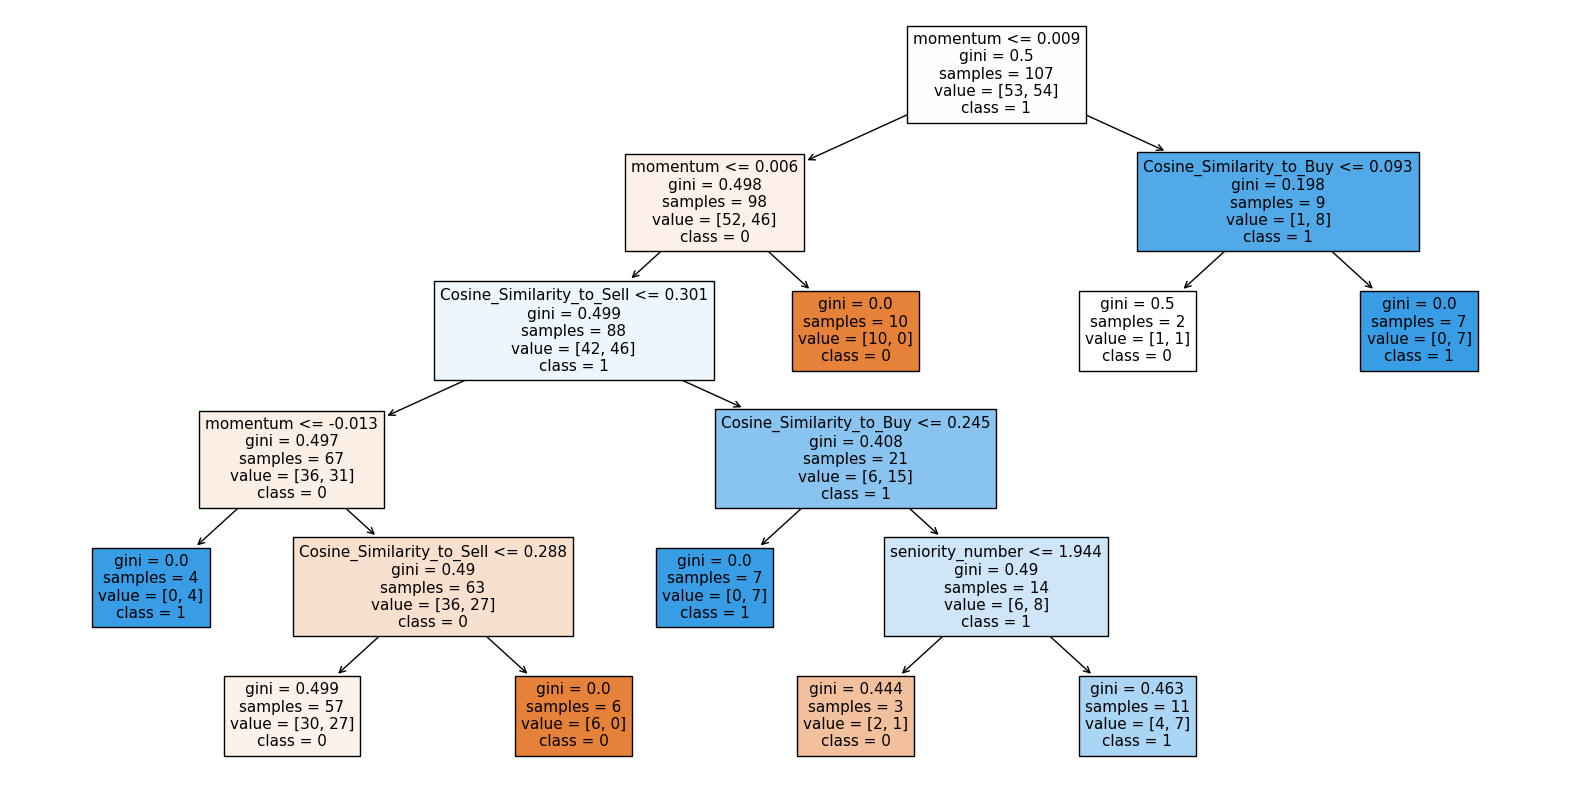

In [22]:
from sklearn.tree import plot_tree

# Assuming 'best_model' is your DecisionTree model
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Convert class names to strings
class_names = [str(class_name) for class_name in y.unique()]

plot_tree(best_model, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

Accuracy: 0.54
Baseline Accuracy: 0.51


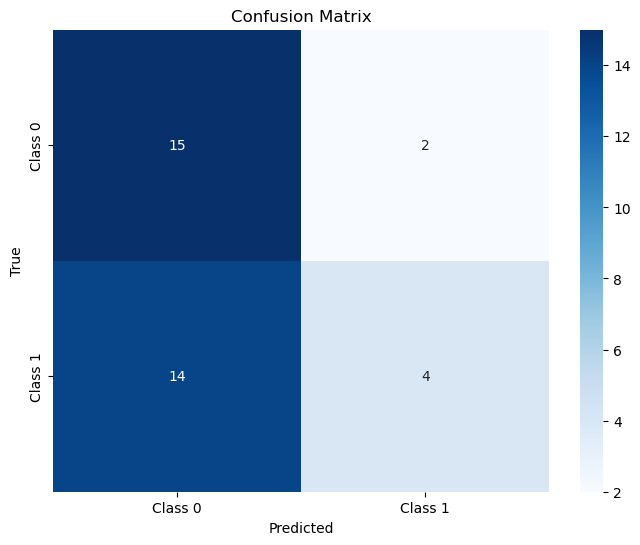

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

y_pred = best_model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")
baseline_accuracy = (y_test == y_test.value_counts().idxmax()).mean()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

# Plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.66
Baseline Accuracy: 0.51


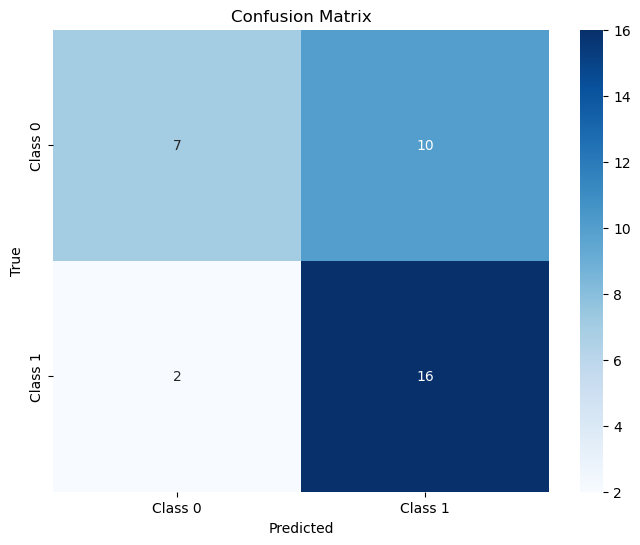

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Assuming 'best_model' supports predict_proba
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1

# Set your custom threshold (e.g., 0.7)
custom_threshold = 0.45

# Convert probabilities to binary predictions based on the threshold
y_pred = (y_pred_prob >= custom_threshold).astype(int)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")
baseline_accuracy = (y_test == y_test.value_counts().idxmax()).mean()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

# Plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [34]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load comments from CSV
df = pd.read_csv('zomato.csv')  # Replace 'your_file.csv' with your actual file name
comments_column = 'Comment'  # Change this to the actual column name containing comments

# Extract comments
comments = df[comments_column].dropna().tolist()

# Perform data preprocessing
stop_words = set(stopwords.words('english'))
tokenized_comments = [word_tokenize(comment.lower()) for comment in comments]
tokenized_comments = [[word for word in comment if word.isalnum() and word not in stop_words] for comment in tokenized_comments]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(comment) for comment in tokenized_comments]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)

# Print topics
topics = lda_model.print_topics(num_words=7)
for topic in topics:
    print(topic)


(0, '0.084*"zomato" + 0.057*"target" + 0.053*"buy" + 0.024*"head" + 0.022*"break" + 0.016*"today" + 0.013*"see"')
(1, '0.049*"zomato" + 0.014*"slovakia" + 0.011*"profit" + 0.010*"booking" + 0.009*"subsidiary" + 0.008*"term" + 0.008*"company"')
(2, '0.044*"zomato" + 0.032*"rs" + 0.022*"shares" + 0.020*"percent" + 0.019*"deal" + 0.019*"crore" + 0.017*"share"')
(3, '0.045*"zomato" + 0.034*"target" + 0.023*"earnings" + 0.023*"buy" + 0.023*"growth" + 0.022*"today" + 0.021*"profitable"')
(4, '0.046*"buy" + 0.032*"hold" + 0.024*"sure" + 0.021*"tgt" + 0.019*"tight" + 0.015*"good" + 0.015*"soon"')
(5, '0.038*"zomato" + 0.011*"stock" + 0.009*"buy" + 0.009*"good" + 0.009*"tiger" + 0.008*"platform" + 0.008*"fee"')
(6, '0.024*"fund" + 0.023*"zomato" + 0.018*"mutual" + 0.011*"today" + 0.011*"selling" + 0.011*"may" + 0.010*"platform"')
(7, '0.039*"zomato" + 0.024*"buy" + 0.021*"big" + 0.018*"stock" + 0.012*"ðÿ" + 0.011*"rally" + 0.010*"back"')
(8, '0.015*"today" + 0.013*"stock" + 0.013*"circuit" + 0.

In [38]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load comments from CSV
df = pd.read_csv('suzlon_energy.csv')  
comments_column = 'Comment'  

# Extract comments
comments = df[comments_column].dropna().tolist()

# Perform data preprocessing
stop_words = set(stopwords.words('english'))
tokenized_comments = [word_tokenize(comment.lower()) for comment in comments]
tokenized_comments = [[word for word in comment if word.isalnum() and word not in stop_words] for comment in tokenized_comments]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(comment) for comment in tokenized_comments]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)

# Print topics
topics = lda_model.print_topics(num_words=7)
for topic in topics:
    print(topic)


(0, '0.031*"suzlon" + 0.011*"adani" + 0.010*"dont" + 0.009*"company" + 0.009*"well" + 0.008*"buy" + 0.007*"energy"')
(1, '0.037*"suzlon" + 0.014*"rs" + 0.012*"stock" + 0.012*"shares" + 0.011*"energy" + 0.010*"next" + 0.008*"buy"')
(2, '0.032*"suzlon" + 0.015*"see" + 0.011*"good" + 0.010*"wind" + 0.008*"27" + 0.007*"one" + 0.007*"profit"')
(3, '0.027*"suzlon" + 0.011*"energy" + 0.009*"group" + 0.009*"one" + 0.008*"invested" + 0.007*"asm" + 0.006*"stock"')
(4, '0.029*"suzlon" + 0.008*"shares" + 0.008*"wind" + 0.007*"adani" + 0.006*"energy" + 0.006*"rs" + 0.006*"india"')
(5, '0.021*"hai" + 0.010*"company" + 0.009*"suzlon" + 0.008*"wind" + 0.008*"energy" + 0.007*"good" + 0.007*"share"')
(6, '0.012*"energy" + 0.010*"wind" + 0.008*"suzlon" + 0.006*"become" + 0.006*"money" + 0.006*"till" + 0.006*"market"')
(7, '0.017*"suzlon" + 0.012*"ds" + 0.011*"price" + 0.010*"share" + 0.009*"good" + 0.009*"sell" + 0.008*"crisil"')
(8, '0.018*"agreement" + 0.015*"company" + 0.011*"suzlon" + 0.009*"group" +

In [31]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming your DataFrame is named 'df'
# Replace 'Comment' with the actual column name containing comments

# Clean and tokenize the "Comment" column
df['Cleaned_Comment'] = df['Comment'].apply(clean_and_tokenize)

# Function to get sentiment scores
def get_sentiment_scores(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply the sentiment analysis function to each row in the "Cleaned_Comment" column
df['Sentiment_Scores'] = df['Cleaned_Comment'].apply(get_sentiment_scores)

# Extract the sentiment scores
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])
df.drop(['Sentiment_Scores'], axis=1, inplace=True)

# Filter stocks with more than 20 rows
stock_counts = df['Stock'].value_counts()
valid_stocks = stock_counts[stock_counts > 20].index.tolist()

# Filter the DataFrame to include only the rows corresponding to valid stocks
df_filtered = df[df['Stock'].isin(valid_stocks)]

# Print the DataFrame with sentiment scores for valid stocks
top_stocks = df_filtered.groupby('Stock')['Compound_Score'].mean().nlargest(5).index.tolist()

print(top_stocks)

['About Forum', 'Idea Cellular', 'Apar Ind', 'Bank Nifty', 'index']
